In [1028]:
try:
    import numpy as np
    from matplotlib import pyplot as plt
    import scipy as sp
    from scipy.signal import freqz
except:
    %pip install numpy
    %pip install matplotlib
    %pip install scipy
    import numpy as np
    import scipy as sp
    from matplotlib import pyplot as plt

In [1029]:
Ts = 1e-6
OSR = 8 #Oversample Rate 20x
B = 0.5/Ts
t0 = Ts/OSR
alpha = (Ts*np.sqrt(np.log(2)))/(np.sqrt(2)*B*Ts)
hmax = np.sqrt(np.pi)/alpha

#https://dsp.stackexchange.com/questions/94057/gaussian-pulse-shaping-filter

In [1030]:
Ts = 1e-6
OSR = 8 #Oversample Rate 20x
B = 0.5/Ts
t0 = Ts/OSR
alpha = (1/(B*Ts))*np.sqrt(np.log(2)/2)
hmax = np.sqrt(np.pi)/alpha

In [1031]:
f = np.linspace(-1/Ts,1/Ts,100)


In [1032]:
print(f"{hmax:.4f} MHz")

1.5054 MHz


(-14.0, 15.0)

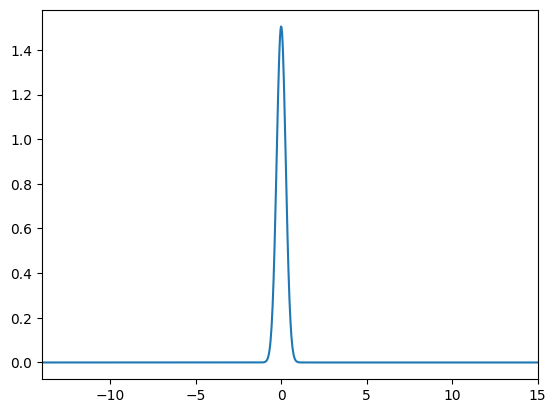

In [1033]:
start = -14
stop = 15


hmax = np.sqrt(np.pi)/alpha
h = lambda t: hmax*np.exp(-((np.pi*t)/alpha)**2)
t = np.linspace(start,stop,1000)
plt.plot(t,h(t))
plt.xlim(start,stop)

In [1034]:
np.log(2)

np.float64(0.6931471805599453)

(-14.0, 15.0)

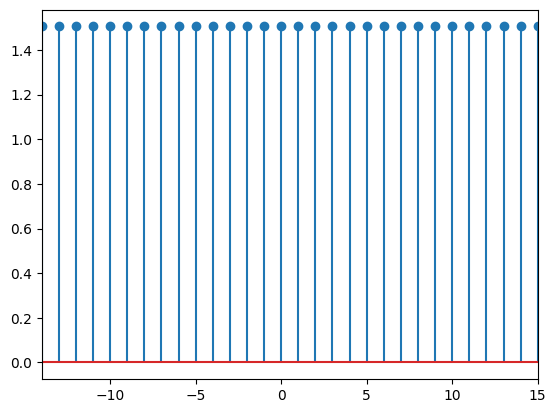

In [1035]:
start = -14
stop = 15


hmax = np.sqrt(np.pi)/alpha
h_discreto = lambda k: hmax*np.exp(-((np.pi/alpha)*t0*k)**2)
k = np.arange(start,stop+1,1)
plt.stem(k,h_discreto(k))
plt.xlim(start,stop)

In [1036]:
h_discreto(k)

array([1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837,
       1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837,
       1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837,
       1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837,
       1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837, 1.5053837])

<StemContainer object of 3 artists>

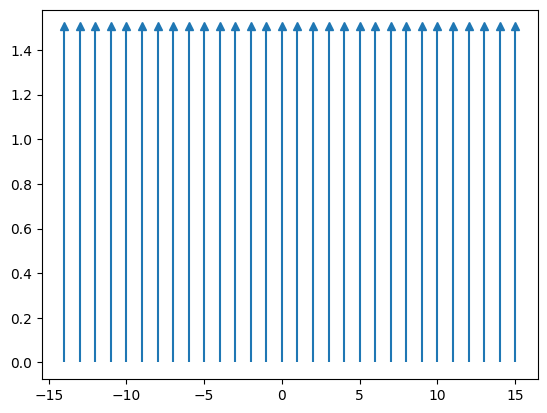

In [1037]:
plt.stem(k,h_discreto(k),markerfmt='^',basefmt=' ')

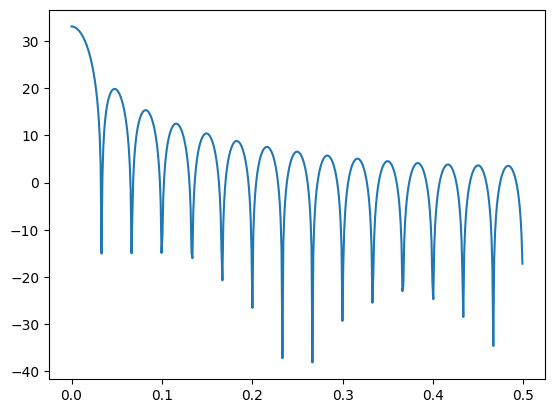

In [1038]:
f,H = freqz(h_discreto(k),a=1,fs=1/Ts)
plt.plot(f/1e+6,20*np.log10(abs(H)))

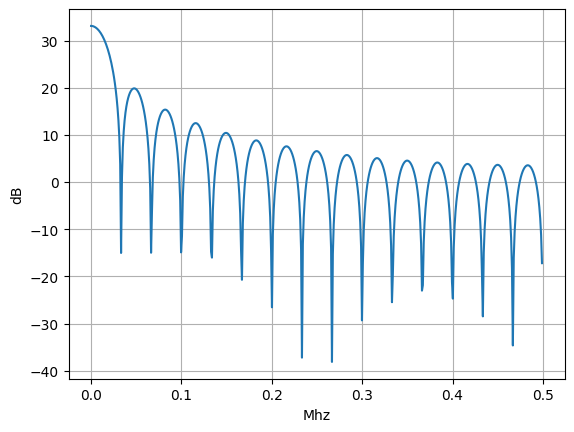

In [1039]:
plt.plot(f/1e+6,20*np.log10(abs(H)))
plt.xlabel("Mhz")
plt.ylabel("dB")
plt.grid(True,which='major')

/tmp/ipykernel_89853/1974482093.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f/1e6,20*np.log10(abs(np.exp(-(alpha*f)**2))))


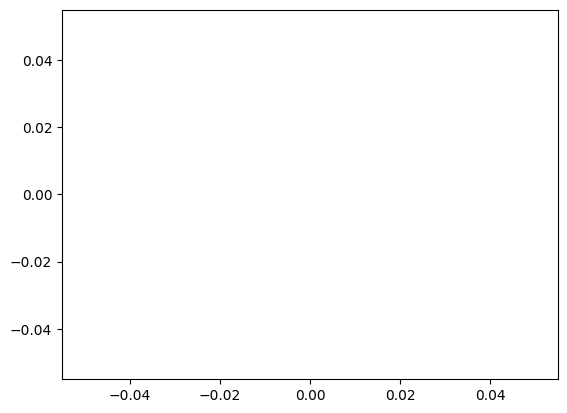

In [1040]:
plt.plot(f/1e6,20*np.log10(abs(np.exp(-(alpha*f)**2))))

In [1041]:
sp.fft.ifft(np.exp(-(alpha*f)**2))

array([0.00195312-0.j, 0.00195312-0.j, 0.00195312+0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312+0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312+0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
       0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j, 0.00195312-0.j,
      

In [1042]:
Nmax = (2**(32-1)-1)
Nmax
q = (np.log2(Nmax) - np.log2(hmax))
q//=2
q

np.float64(15.0)

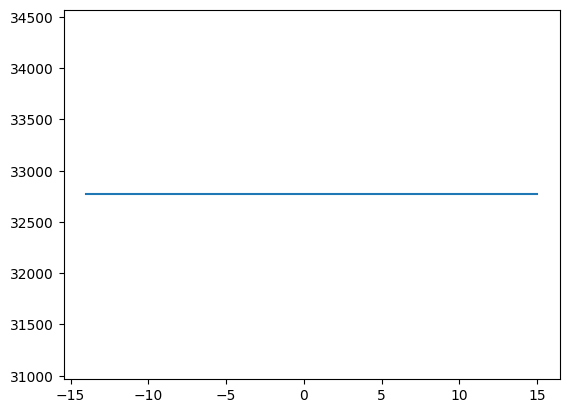

In [1043]:
h_em_q14 = [int(np.round((h_discreto(k)/hmax)[i]*2**q)) for i in range (len(k))]
plt.plot(k,h_em_q14)

In [1044]:
def int2comp2(val, nbits=32):
    return hex((val + (1 << nbits)) % (1 << nbits))

int2comp2(100)

'0x64'

In [1045]:
def comp2int(val, nbits=32):
    val=int(val,16)
    if(val & 1 << nbits-1):
        return (~val+1)%(1<<nbits)*(-1)
    return val

In [1046]:
file = open("coefs_ponto_fixo_q8.txt",'w+')
for i in range(len(h_em_q14)):
    print(int2comp2(h_em_q14[i])[2:])
    file.write(f'{int2comp2(h_em_q14[i])[2:]}\n')
file.close()

8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000


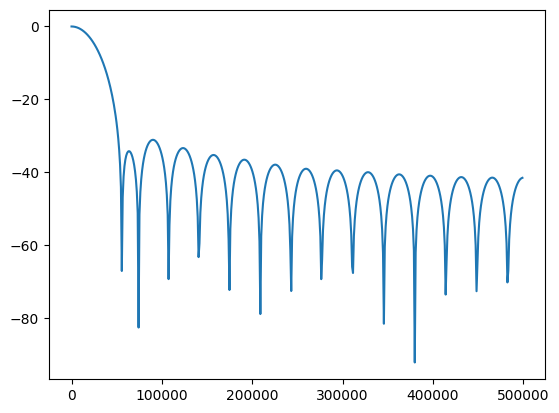

In [1047]:
h = np.array([0.0096 ,   0.0122,    0.0153 ,   0.0189 ,   0.0228  ,  0.0271 ,   0.0317 ,   0.0363,

    0.0408 ,   0.0451 ,   0.0490,    0.0522,    0.0546   , 0.0561 ,   0.0566 ,   0.0561,

    0.0546 ,   0.0522 ,   0.0490    ,0.0451   , 0.0408 ,   0.0363    ,0.0317 ,   0.0271,

    0.0228 ,   0.0189 ,   0.0153   , 0.0122   , 0.0096])
f,H =freqz(h,a = 1,fs=1/Ts)
plt.plot(f,20*np.log10(abs(H)))